In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
# Mixing theory says that to find the mixing index of a picture, the percentage tracer value (xi) is needed for all 'N' samples. In image anaysis this theory can be modified to find xi by calculating the pixel value in grayscale, suggesting that higher pixel value(xi0) means presence of less tracer (low xi) and vice versa
# The calculation is mentioned below

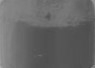

In [ ]:
fluorescent_particle = cv2.imread("fluorescent particle.jpg")
grayscale = cv2.cvtColor(fluorescent_particle,cv2.COLOR_RGB2GRAY)
cv2_imshow(grayscale)
# conversion of flourescent powder picture to grayscale


In [ ]:
np.min(np.array(grayscale))
# Checking the grayscale pixel value for flourscent powder to set the minimum valid pixel value

73

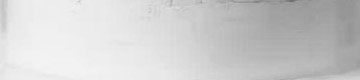

In [ ]:
powder = cv2.imread("powder.jpg")
grayscale = cv2.cvtColor(powder,cv2.COLOR_RGB2GRAY)
cv2_imshow(grayscale)
# Conversion of white powder(diatomite/china clay/quartz) picture to grayscale

In [ ]:
np.max(np.array(grayscale))
#Checking the grayscale pixel value for white powder to set the maximum valid pixel value
# This range from [73,244] is the valid range, points outside this range are outliers and will be removed

244

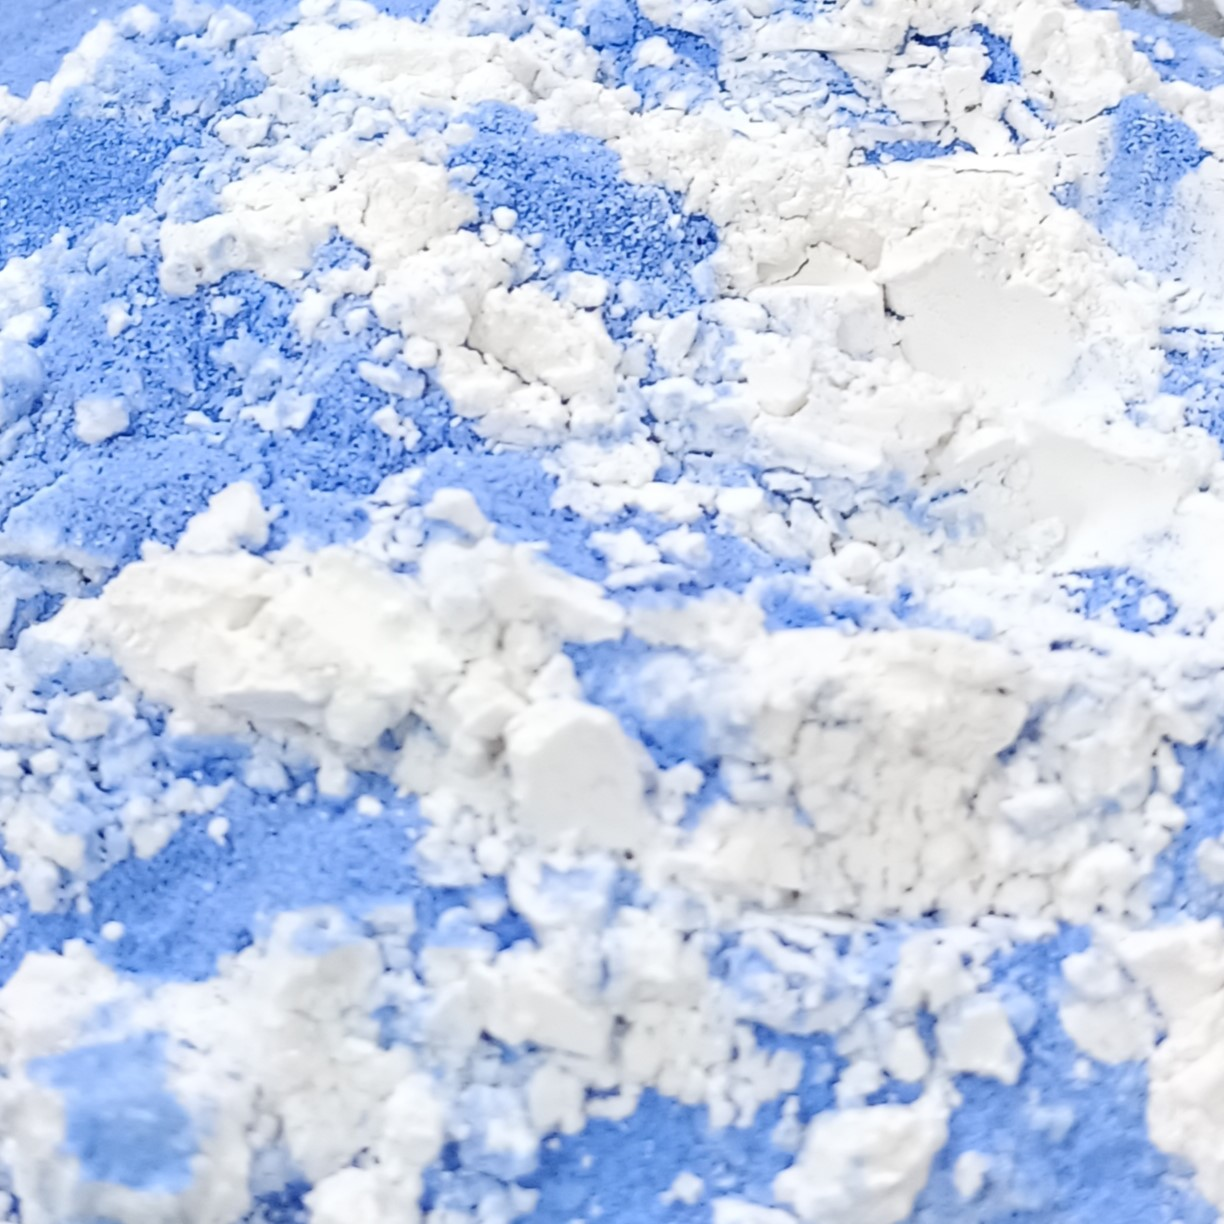

In [ ]:
img = cv2.imread("Diatomite.jpg")
cv2_imshow(img)

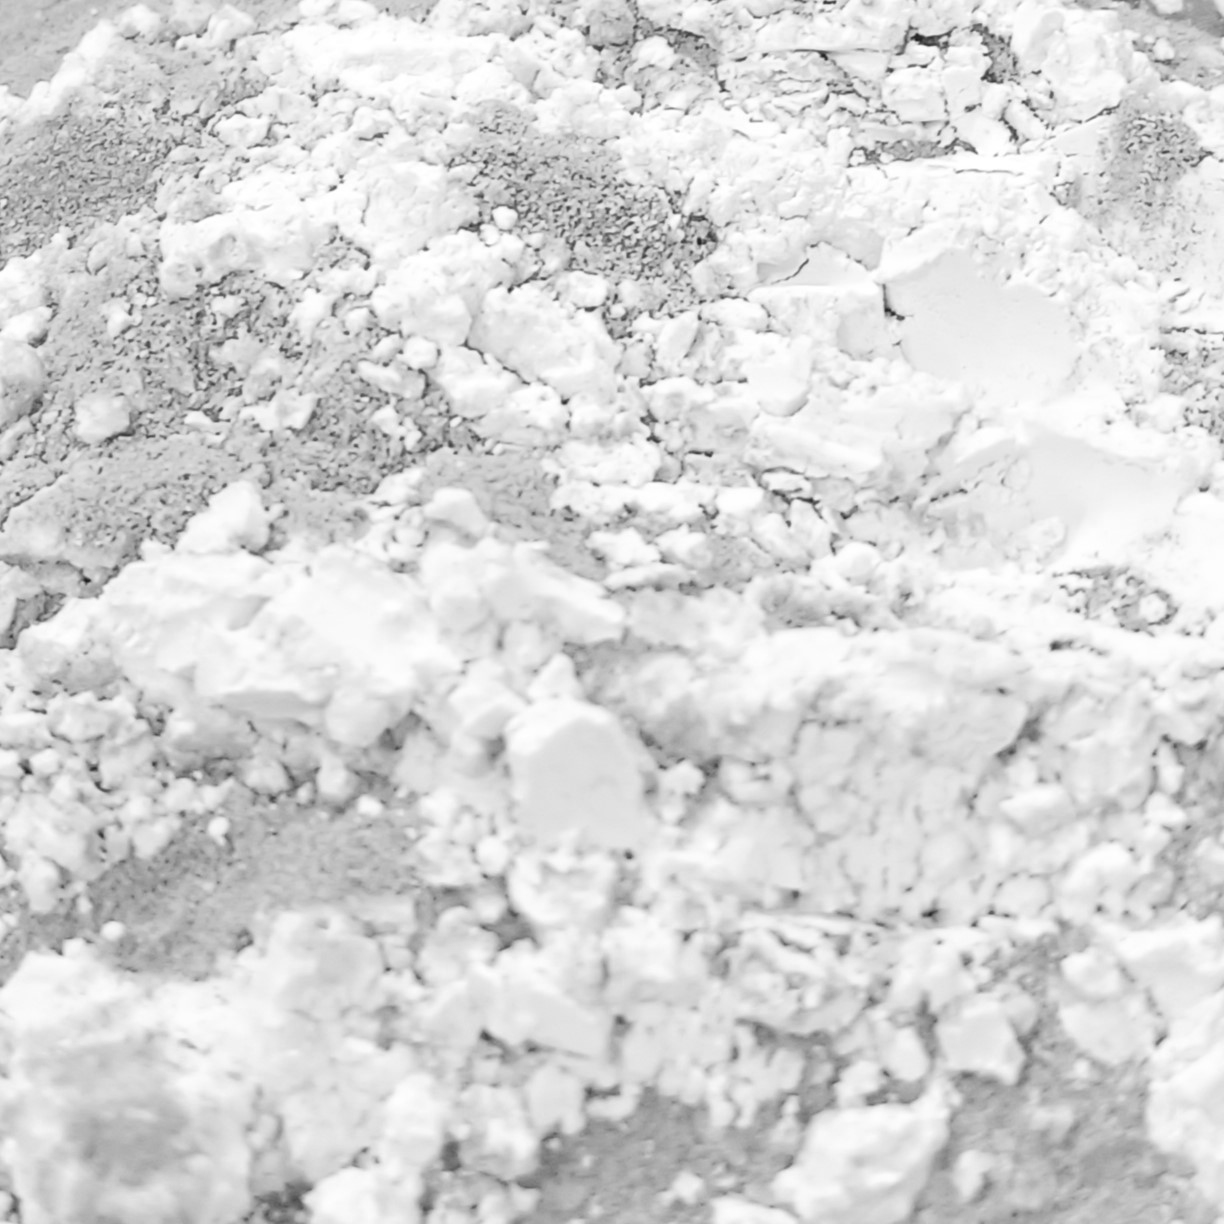

In [ ]:
grayscale = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
cv2_imshow(grayscale)
# converting diatomite+blue powder image to grayscale image to find grayscale pixel values. These values when normalized will give values between [0,1] which will be the Normalized Value of the ith pixel in grayscale

In [ ]:
grayscale[np.where(grayscale < 73)] = 0
grayscale[np.where(grayscale > 244)] = 0
index_zero = np.where(grayscale == 0)
grayscale

# setting all the the invalid pixel values (below 73 and above 244) to 0 since they are outliers
# storing all the existing 0 values to index_zero to set them to nan later

array([[191, 193, 195, ..., 235, 236, 235],
       [192, 196, 198, ..., 234, 235, 235],
       [189, 194, 197, ..., 234, 235, 235],
       ...,
       [211, 209, 206, ..., 235, 237, 238],
       [223, 221, 220, ..., 236, 238, 240],
       [233, 230, 229, ..., 237, 238, 239]], dtype=uint8)

In [ ]:
range = 244 - 73
grayscale_normalized  = (grayscale - 73) / range
grayscale_normalized
# normalize the scale to keep xi0 values between [0,1]

array([[0.69005848, 0.70175439, 0.71345029, ..., 0.94736842, 0.95321637,
        0.94736842],
       [0.69590643, 0.71929825, 0.73099415, ..., 0.94152047, 0.94736842,
        0.94736842],
       [0.67836257, 0.70760234, 0.7251462 , ..., 0.94152047, 0.94736842,
        0.94736842],
       ...,
       [0.80701754, 0.79532164, 0.77777778, ..., 0.94736842, 0.95906433,
        0.96491228],
       [0.87719298, 0.86549708, 0.85964912, ..., 0.95321637, 0.96491228,
        0.97660819],
       [0.93567251, 0.91812865, 0.9122807 , ..., 0.95906433, 0.96491228,
        0.97076023]])

In [ ]:
# Calculating xi (percentage of tracer in th pixel) using xi=1-xi0
final_normalized = 1 - grayscale_normalized
# setting all the invalid pixel values to nan to remove them from N (number of samples)
final_normalized[index_zero] = np.nan
# final xi values
final_normalized


array([[0.30994152, 0.29824561, 0.28654971, ..., 0.05263158, 0.04678363,
        0.05263158],
       [0.30409357, 0.28070175, 0.26900585, ..., 0.05847953, 0.05263158,
        0.05263158],
       [0.32163743, 0.29239766, 0.2748538 , ..., 0.05847953, 0.05263158,
        0.05263158],
       ...,
       [0.19298246, 0.20467836, 0.22222222, ..., 0.05263158, 0.04093567,
        0.03508772],
       [0.12280702, 0.13450292, 0.14035088, ..., 0.04678363, 0.03508772,
        0.02339181],
       [0.06432749, 0.08187135, 0.0877193 , ..., 0.04093567, 0.03508772,
        0.02923977]])

In [ ]:
# calculating s from xi values
np.nanstd(final_normalized)

0.16207069379679054

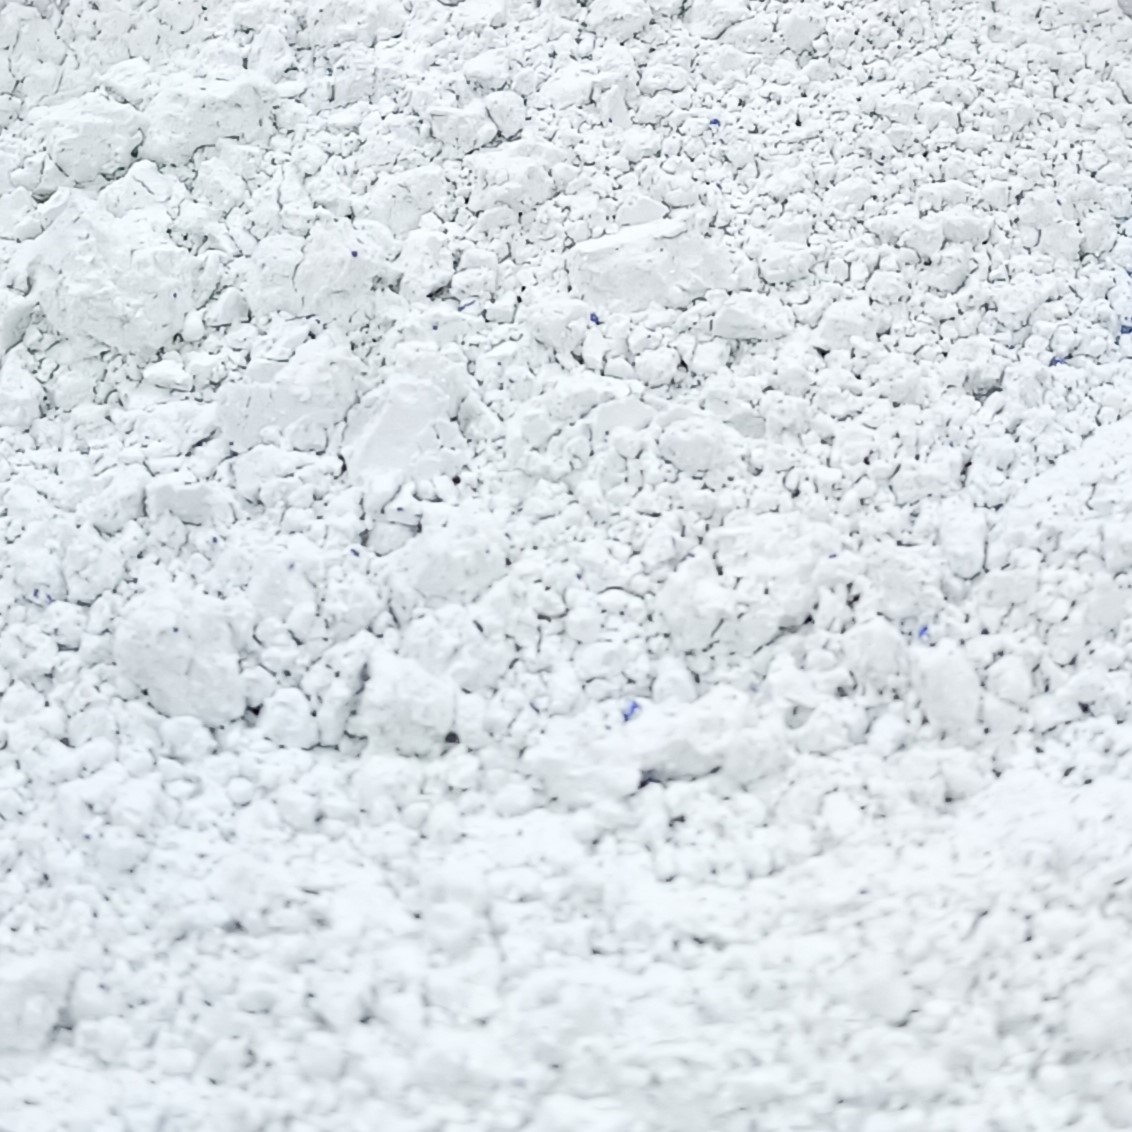

In [ ]:
img = cv2.imread("china clay.jpg")
cv2_imshow(img)

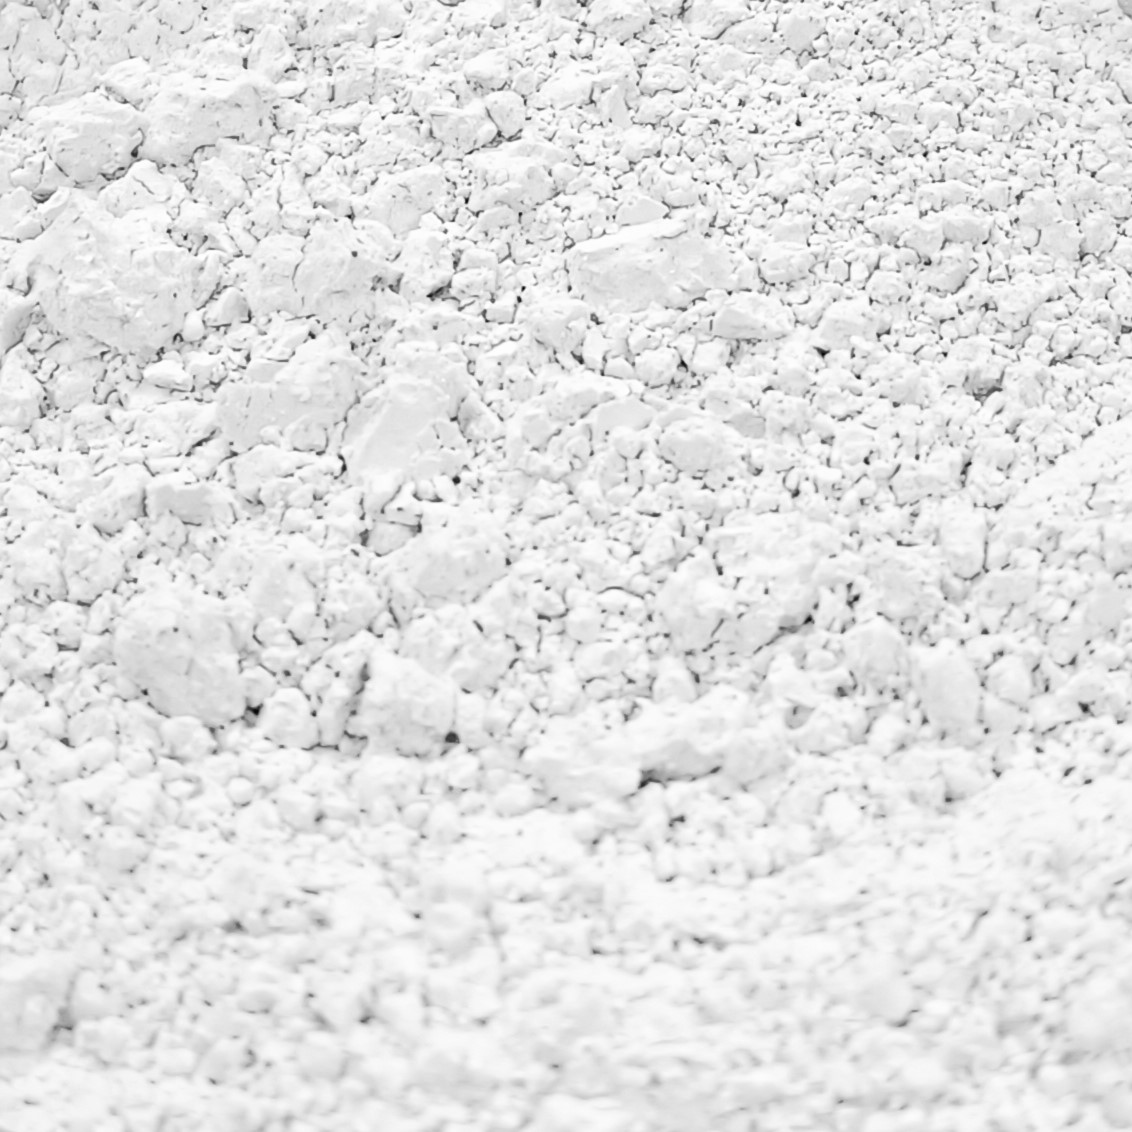

In [ ]:
grayscale = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
cv2_imshow(grayscale)

In [ ]:
grayscale[np.where(grayscale < 73)] = 0
grayscale[np.where(grayscale > 244)] = 0
index_zero = np.where(grayscale == 0)
grayscale

array([[214, 213, 207, ..., 197, 197, 198],
       [215, 214, 206, ..., 197, 197, 196],
       [210, 208, 201, ..., 197, 196, 195],
       ...,
       [207, 209, 212, ..., 231, 231, 231],
       [200, 202, 205, ..., 235, 235, 235],
       [197, 198, 200, ..., 238, 238, 238]], dtype=uint8)

In [ ]:
range = 244 - 73
grayscale_normalized  = (grayscale - 73) / range
grayscale_normalized

array([[0.8245614 , 0.81871345, 0.78362573, ..., 0.7251462 , 0.7251462 ,
        0.73099415],
       [0.83040936, 0.8245614 , 0.77777778, ..., 0.7251462 , 0.7251462 ,
        0.71929825],
       [0.80116959, 0.78947368, 0.74853801, ..., 0.7251462 , 0.71929825,
        0.71345029],
       ...,
       [0.78362573, 0.79532164, 0.8128655 , ..., 0.92397661, 0.92397661,
        0.92397661],
       [0.74269006, 0.75438596, 0.77192982, ..., 0.94736842, 0.94736842,
        0.94736842],
       [0.7251462 , 0.73099415, 0.74269006, ..., 0.96491228, 0.96491228,
        0.96491228]])

In [ ]:
final_normalized = 1 - grayscale_normalized
final_normalized[index_zero] = np.nan
final_normalized

array([[0.1754386 , 0.18128655, 0.21637427, ..., 0.2748538 , 0.2748538 ,
        0.26900585],
       [0.16959064, 0.1754386 , 0.22222222, ..., 0.2748538 , 0.2748538 ,
        0.28070175],
       [0.19883041, 0.21052632, 0.25146199, ..., 0.2748538 , 0.28070175,
        0.28654971],
       ...,
       [0.21637427, 0.20467836, 0.1871345 , ..., 0.07602339, 0.07602339,
        0.07602339],
       [0.25730994, 0.24561404, 0.22807018, ..., 0.05263158, 0.05263158,
        0.05263158],
       [0.2748538 , 0.26900585, 0.25730994, ..., 0.03508772, 0.03508772,
        0.03508772]])

In [ ]:
np.nanstd(final_normalized)

0.12444827550105385

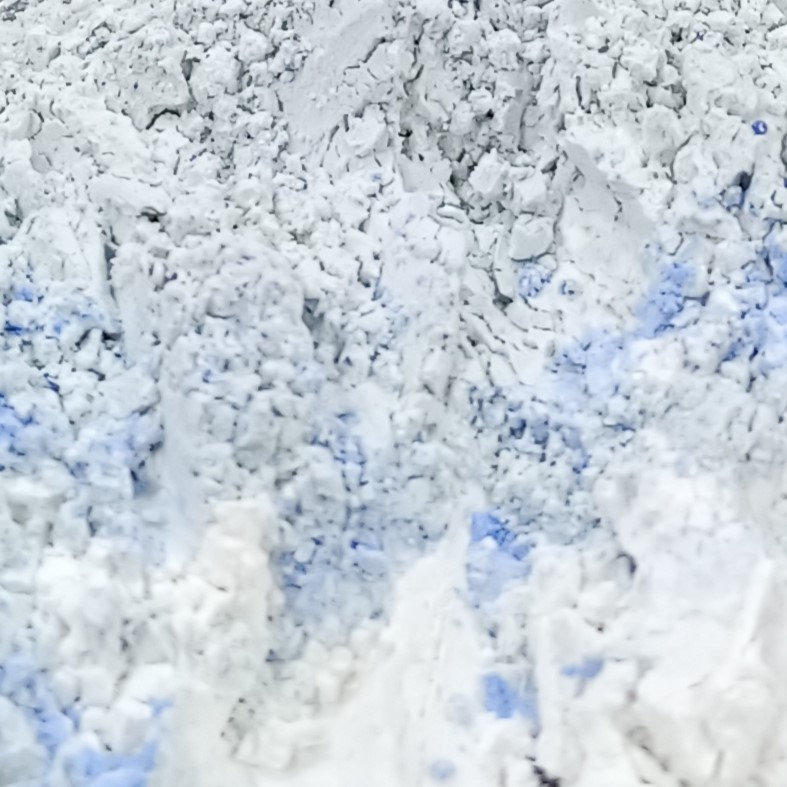

In [ ]:
img = cv2.imread("quartz2.jpg")
cv2_imshow(img)

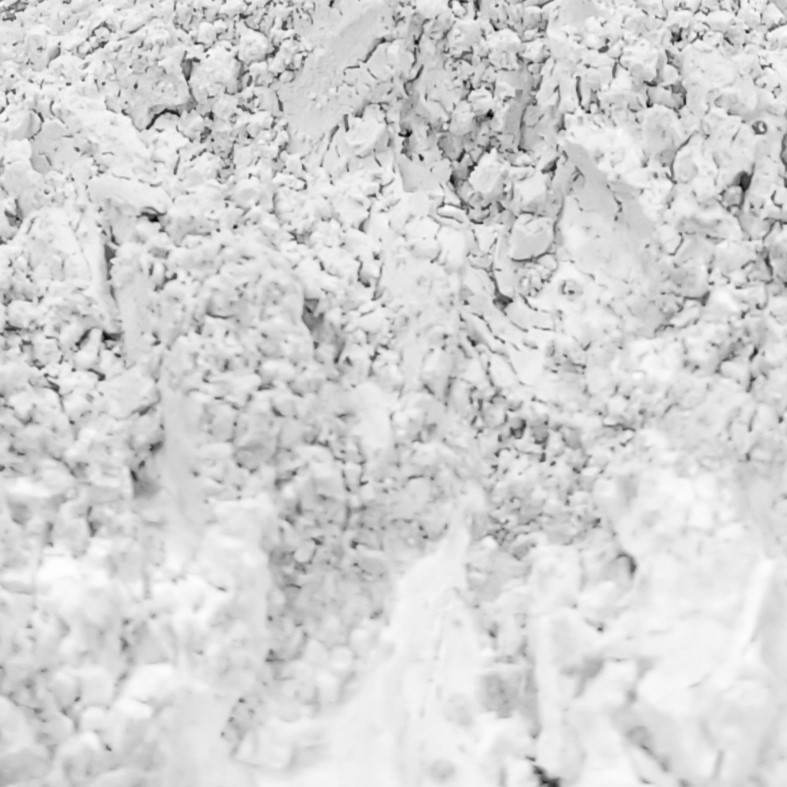

In [ ]:
grayscale = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
cv2_imshow(grayscale)

In [ ]:
grayscale[np.where(grayscale < 73)] = 0
grayscale[np.where(grayscale > 244)] = 0
index_zero = np.where(grayscale == 0)
grayscale

array([[129, 145, 174, ..., 203, 208, 212],
       [155, 185, 217, ..., 202, 206, 210],
       [208, 233,   0, ..., 200, 204, 208],
       ...,
       [169, 169, 171, ..., 226, 227, 228],
       [172, 172, 175, ..., 226, 227, 228],
       [174, 175, 178, ..., 225, 226, 228]], dtype=uint8)

In [ ]:
range = 244 - 73
grayscale_normalized  = (grayscale - 73) / range
grayscale_normalized

array([[0.32748538, 0.42105263, 0.59064327, ..., 0.76023392, 0.78947368,
        0.8128655 ],
       [0.47953216, 0.65497076, 0.84210526, ..., 0.75438596, 0.77777778,
        0.80116959],
       [0.78947368, 0.93567251, 1.07017544, ..., 0.74269006, 0.76608187,
        0.78947368],
       ...,
       [0.56140351, 0.56140351, 0.57309942, ..., 0.89473684, 0.9005848 ,
        0.90643275],
       [0.57894737, 0.57894737, 0.59649123, ..., 0.89473684, 0.9005848 ,
        0.90643275],
       [0.59064327, 0.59649123, 0.61403509, ..., 0.88888889, 0.89473684,
        0.90643275]])

In [ ]:
final_normalized = 1 - grayscale_normalized
final_normalized[index_zero] = np.nan
final_normalized

array([[0.67251462, 0.57894737, 0.40935673, ..., 0.23976608, 0.21052632,
        0.1871345 ],
       [0.52046784, 0.34502924, 0.15789474, ..., 0.24561404, 0.22222222,
        0.19883041],
       [0.21052632, 0.06432749,        nan, ..., 0.25730994, 0.23391813,
        0.21052632],
       ...,
       [0.43859649, 0.43859649, 0.42690058, ..., 0.10526316, 0.0994152 ,
        0.09356725],
       [0.42105263, 0.42105263, 0.40350877, ..., 0.10526316, 0.0994152 ,
        0.09356725],
       [0.40935673, 0.40350877, 0.38596491, ..., 0.11111111, 0.10526316,
        0.09356725]])

In [ ]:
np.nanstd(final_normalized)

0.14767200404042632